In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

In [2]:
#rule 이진법함수
def get_wolfram_rule( rule_number ):
    '''
    Gets the mapping for the given rule.
    Each rule is essentially the binary version of the rule number
    '''
    binary_rep = str(bin(rule_number))[2:]
    # prepend 0s so that the are 8 bits
    binary_rep = [0]*(8-len(binary_rep)) + [int(b) for b in binary_rep]

    mapping = {
         (0,0,0): binary_rep[7],
         (0,0,1): binary_rep[6],
         (0,1,0): binary_rep[5],
         (0,1,1): binary_rep[4],
         (1,0,0): binary_rep[3],
         (1,0,1): binary_rep[2],
         (1,1,0): binary_rep[1],
         (1,1,1): binary_rep[0],
    }

    return mapping


In [3]:
#다음세대 계산함수
def get_next_seq(previous_seq, rule):
    '''
    Use a rule to generate the next sequence for an automoton
    '''

    seq_length = len(previous_seq) - 2
#     rule_length = len(rule.keys()[0])
    rule_length = 3
    sub_seqs = [tuple(previous_seq[i:i + rule_length]) for i in range(0, seq_length)]
    new_seq = [rule[sub_seq] for sub_seq in sub_seqs]

    # Zero pad the ends
    new_seq.insert(0, 0)
    new_seq.append(0)
    return new_seq

In [11]:
def rule_pattern(rule_num):
    rand.seed(1)
    idx = rand.choice(400 ,100 ,replace=False) # 100개의 점을 뿌림
    prev = np.zeros(1400) # 프리 바운더리 조건
    prev[500+idx] =1

    num_gens = 400
    data = []

    for i in range(num_gens):
      data.append(prev)
      prev = get_next_seq(prev, get_wolfram_rule(rule_num))

    data = np.array(data)
    data = data[:,500:900]

    return data

Text(0.5, 1.0, 'rule number :14 ')

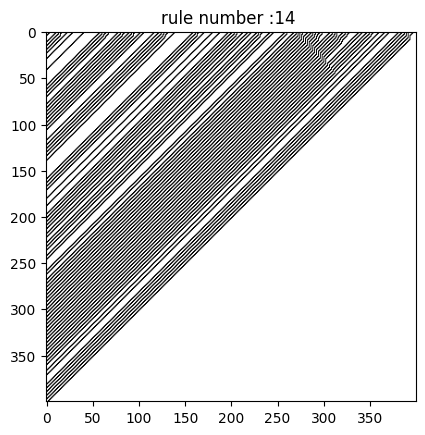

In [12]:
X = rule_pattern(14)
plt.imshow(np.array(X), cmap="binary")
plt.title('rule number :%s '%int(14))

Text(0.5, 1.0, 'rule number :30 ')

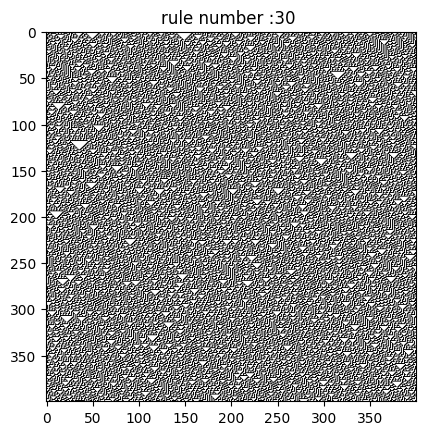

In [13]:
X = rule_pattern(30)
plt.imshow(np.array(X), cmap="binary")
plt.title('rule number :%s '%int(30))